In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

### Loading the data

In [54]:
from sklearn import datasets
boston = datasets.load_boston()
x = boston.data
y = boston.target

###  Splitting the data into train and test

In [55]:
train,test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [56]:
std=StandardScaler()
std.fit(train)
train=std.transform(train)
test=std.transform(test)

In [92]:
print(train.shape)
print(test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


## 1] Linear Regression: 

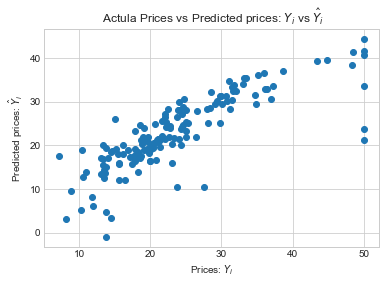

In [57]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linear = LinearRegression()
linear.fit(train, y_train)

Y_pred = linear.predict(test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title(" Actula Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error
print("\n---Intercept--- \n",linear.intercept_)
print("\n---MSE--- \n",mean_squared_error(y_test,Y_pred))


---Intercept--- 
 22.075988700564995

---MSE--- 
 29.639226627031157


In [74]:
linear.coef_

array([-0.39141044,  0.64564591,  0.21014669,  0.6236431 , -1.8322736 ,
        3.22193681,  0.19120687, -2.39677582,  2.08708748, -2.03230908,
       -2.00158151,  0.80297842, -3.5017577 ])

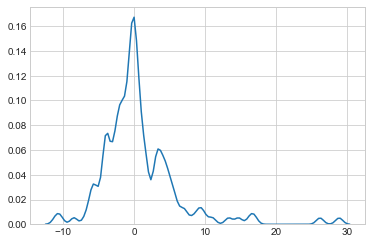

In [59]:
delta_Y = y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_Y), bw=0.5)
plt.show()

## 2] SGDRegressor:

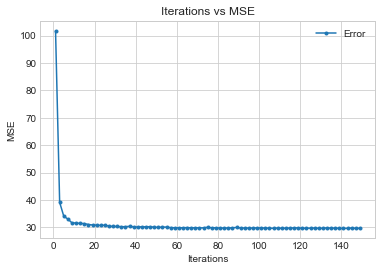

In [60]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Intercept=[]
MSE=[]

from sklearn.linear_model import SGDRegressor

iterations=[i for i in range(1,150,2)]

for i in iterations:
    
    sgdr=SGDRegressor(max_iter=i,eta0=0.01)
    sgdr.fit(train, y_train)
    sgdPred=sgdr.predict(test)
    
    
    ints=sgdr.intercept_
    Intercept.append(ints)
    
    mse=mean_squared_error(y_test,sgdPred)
    MSE.append(mse)
    
    
plt.plot(iterations, MSE, label='Error',marker = '.') 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()  





------------For iteration =  1 -------------

---Intercept--- 
 [14.76161761]

---MSE--- 
 101.18642025175446

---Weights---
 [-0.3315224   0.50136211 -0.2104345   1.19475042 -0.64602145  2.48530182
  0.05157279 -0.57581565  0.02146916 -0.62529429 -1.26519017  0.47184711
 -2.38757808]


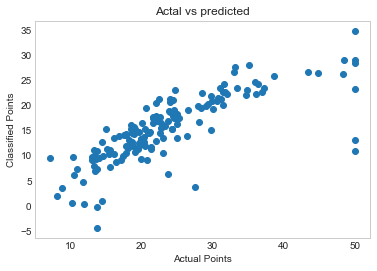



------------For iteration =  50 -------------

---Intercept--- 
 [22.07657535]

---MSE--- 
 29.925950934550716

---Weights---
 [-0.32582223  0.55309855  0.01676179  0.64371998 -1.74233679  3.25935793
  0.15364049 -2.35583665  1.56090508 -1.41835964 -1.98672797  0.77685363
 -3.44917886]


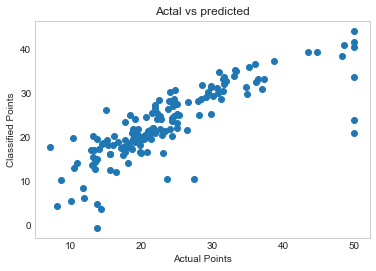



------------For iteration =  100 -------------

---Intercept--- 
 [22.06928632]

---MSE--- 
 29.78748107286309

---Weights---
 [-0.36210329  0.60493581  0.1260403   0.62817332 -1.80789389  3.24674235
  0.18376596 -2.38887343  1.84484436 -1.75962629 -2.01002412  0.80449309
 -3.4763977 ]


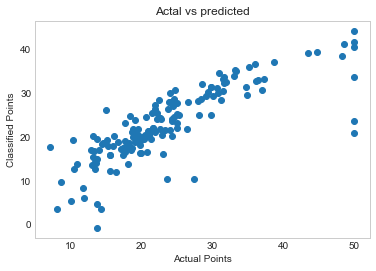



------------For iteration =  200 -------------

---Intercept--- 
 [22.08163119]

---MSE--- 
 29.646241057664245

---Weights---
 [-0.37783873  0.63869142  0.19189042  0.64597337 -1.82982258  3.2254632
  0.19161459 -2.39591956  2.03586554 -1.96440919 -2.00527658  0.80768589
 -3.49724408]


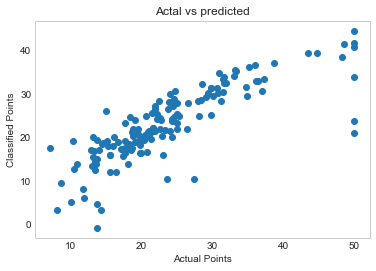



------------For iteration =  500 -------------

---Intercept--- 
 [22.08162989]

---MSE--- 
 29.68496336195118

---Weights---
 [-0.39183126  0.64255961  0.20965997  0.62250998 -1.83831697  3.23751152
  0.19443914 -2.40074516  2.08166176 -2.03171443 -2.00742758  0.80615935
 -3.51333108]


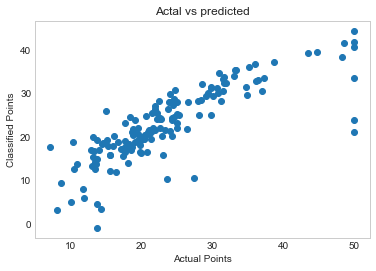



------------For iteration =  1000 -------------

---Intercept--- 
 [22.07783385]

---MSE--- 
 29.624314410575536

---Weights---
 [-0.38744448  0.64515912  0.21109655  0.62322648 -1.83279097  3.21452226
  0.19480624 -2.39853913  2.08624265 -2.03109239 -2.00343098  0.80008971
 -3.50132317]


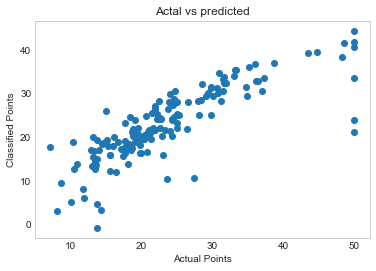

In [61]:
iteration=[1,50,100,200,500,1000]
for i in iteration:
    
    
    sgdr1=SGDRegressor(max_iter=i,eta0=0.01)
    sgdr1.fit(train, y_train)
    sgdPredi=sgdr1.predict(test)
    
    
    print("\n\n------------For iteration = ",i,"-------------")
    print("\n---Intercept--- \n",sgdr1.intercept_)
    print("\n---MSE--- \n",mean_squared_error(y_test,sgdPredi))
    print("\n---Weights---\n",sgdr1.coef_ )
    
    
    plt.title("Actal vs predicted")
    plt.scatter(y_test, sgdPredi)
    plt.ylabel('Classified Points')
    plt.xlabel('Actual Points')
    plt.grid()
    plt.show()

In [76]:
sgdr12=SGDRegressor(max_iter=1000,eta0=0.01)
sgdr12.fit(train, y_train)
sgdPredi=sgdr12.predict(test)
print("\n---Weights---\n",sgdr12.coef_ )


---Weights---
 [-0.39519675  0.64603713  0.21004181  0.62830435 -1.83062712  3.21944759
  0.19529167 -2.39998764  2.08529065 -2.02854206 -2.00812188  0.80130634
 -3.50121121]


## 3] Manual SGD:

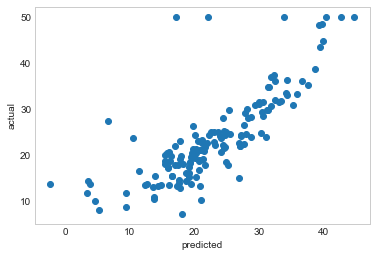

<---------------For iteration =  1 ------------------>
------MSE-------
 34.28494426944389 

------Weights-----

 [[-0.26691226]
 [ 0.2509193 ]
 [-1.26117409]
 [ 0.95350823]
 [-0.08772309]
 [ 4.1269758 ]
 [-0.41244905]
 [-1.85405714]
 [-0.29473997]
 [ 0.40309991]
 [-1.40946467]
 [ 1.02214351]
 [-2.93441223]]
<-------------------------------------------------------->


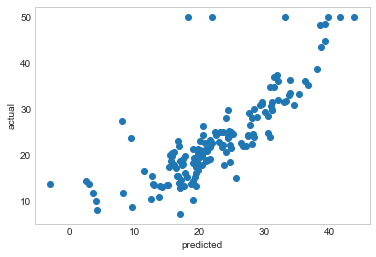

<---------------For iteration =  50 ------------------>
------MSE-------
 33.745620336887335 

------Weights-----

 [[-0.33086005]
 [ 0.25138134]
 [-1.21706925]
 [ 0.85673191]
 [-0.43541502]
 [ 3.70368476]
 [-0.02006926]
 [-1.65318279]
 [ 0.06724778]
 [ 0.00426414]
 [-1.46299885]
 [ 0.64087056]
 [-3.3074079 ]]
<-------------------------------------------------------->


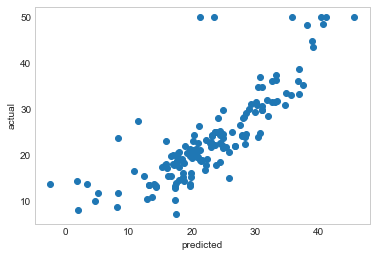

<---------------For iteration =  100 ------------------>
------MSE-------
 30.744757356817217 

------Weights-----

 [[-0.53216079]
 [ 0.70452672]
 [-0.60751332]
 [ 1.14609317]
 [-0.60357069]
 [ 3.23787176]
 [ 0.22720451]
 [-1.90803309]
 [ 1.62305393]
 [-1.36420754]
 [-1.60508669]
 [ 0.80354693]
 [-3.84865033]]
<-------------------------------------------------------->


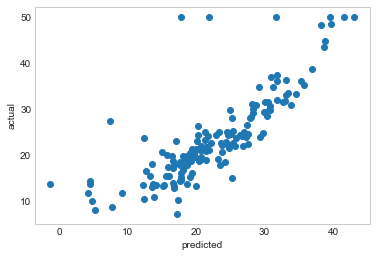

<---------------For iteration =  200 ------------------>
------MSE-------
 31.99231431636009 

------Weights-----

 [[-0.52501801]
 [ 0.16330325]
 [ 0.17103958]
 [ 0.60994777]
 [-1.38717129]
 [ 3.67252077]
 [-0.42359425]
 [-1.95406169]
 [ 1.07955291]
 [-1.14461603]
 [-1.9802214 ]
 [ 0.83995239]
 [-2.78738315]]
<-------------------------------------------------------->


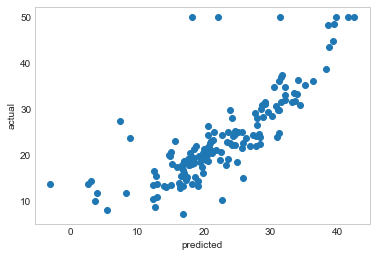

<---------------For iteration =  500 ------------------>
------MSE-------
 35.016153108553695 

------Weights-----

 [[ 0.08324214]
 [ 0.16493267]
 [-0.3555119 ]
 [ 0.42547094]
 [-1.13943889]
 [ 3.66367543]
 [ 0.35604704]
 [-1.41373939]
 [-0.17683128]
 [-0.1849742 ]
 [-1.86676257]
 [ 0.64798062]
 [-3.43129702]]
<-------------------------------------------------------->


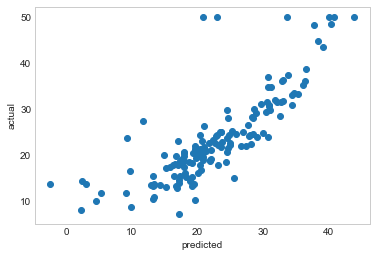

<---------------For iteration =  1000 ------------------>
------MSE-------
 30.958224560727338 

------Weights-----

 [[-0.26270117]
 [ 0.74272313]
 [-0.66775277]
 [ 0.74493449]
 [-0.14138794]
 [ 3.11243534]
 [-0.21088899]
 [-2.11898057]
 [ 1.03284177]
 [-1.37183868]
 [-1.3209929 ]
 [ 0.83229766]
 [-3.93484605]]
<-------------------------------------------------------->


In [62]:
iter=[1,50,100,200,500,1000]
for itr in iter:
    iterations=100
    learningrate=0.5
    power_t=0.25
    Weight=np.random.randn(13,1)
    intercept=np.random.randn(1,1)
    train_MSE=[]
  
    
    for iteration in range(1,iterations):
        N=train.shape[0]
        iteration_error=0
    
    
   
    
        for i in range(N):
        #batch
            batch=np.random.randint(0,N)
        
            X_train=train[batch,:]
            X_train=X_train.reshape(1,train.shape[1])

            Y_train=y_train[batch]
            Y_train=Y_train.reshape(1,1)
        
        
        
        
        
            Predicted_Y=np.dot(X_train,Weight)+ intercept           #  w.T*X+b
        
        
        
            ERROR=Predicted_Y - Y_train
        
        
            iteration_error+=ERROR**2                                  #squared error + summing
        
        
    
            Weight=Weight-(2/N)*learningrate*(X_train.T.dot(ERROR))              #w(i)=w(i-1)-(2/n)*lrate*(y(i)-w.T*X(i)*X(i))
        
       
            intercept=intercept-learningrate*(2/N)*(ERROR)
        
        mse=iteration_error/N
        train_MSE.append(mse)
    
        learningrate = learningrate / pow(iteration, power_t)
    

    
    
    predicted=[]
    for data in test:
        predicted.append(np.dot(data,Weight)+intercept)
    
    pre=np.array(predicted)
    
    dataset_size = len(pre)
    TwoDim_dataset = pre.reshape(dataset_size,-1)
    
   
    plt.scatter(TwoDim_dataset,y_test)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.grid()
    plt.show()
    print("<---------------For iteration = ",itr,"------------------>")
    print("------MSE-------\n",mean_squared_error(y_test,TwoDim_dataset),"\n")
    print("------Weights-----\n\n",Weight)
    print("<-------------------------------------------------------->")

In [65]:
MsE=np.array(train_MSE)

In [66]:
MsE.shape

(99, 1, 1)

In [67]:
dataset_size = len(MsE)
TwoDim_MSE = MsE.reshape(dataset_size,-1)

In [68]:
TwoDim_MSE.shape

(99, 1)

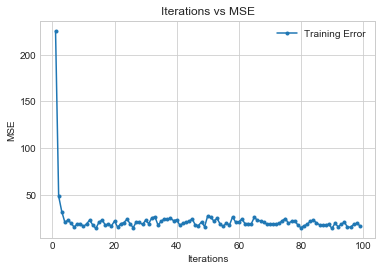

In [70]:
iterations=[i for i in range(1,100,1)]
plt.plot(iterations, TwoDim_MSE, label='Training Error',marker = '.') 

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Iterations vs MSE")
plt.show()  

# Linear Regression VS Sklearn SGDRegressor VS Manual SGD 

## Weights Comparison :

In [80]:
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13]

ptable = PrettyTable()


ptable.add_column("Sr.NO.",numbering)
ptable.add_column("Weights Linear regression",linear.coef_)
ptable.add_column("Weights of Sklearn's SGDregressor",sgdr12.coef_)
ptable.add_column("Weights of Manual SGD",Weight)



print(ptable)

+--------+---------------------------+-----------------------------------+-----------------------+
| Sr.NO. | Weights Linear regression | Weights of Sklearn's SGDregressor | Weights of Manual SGD |
+--------+---------------------------+-----------------------------------+-----------------------+
|   1    |    -0.39141043592205743   |        -0.39519674714268793       |     [-0.26270117]     |
|   2    |     0.6456459056506023    |         0.6460371315384743        |      [0.74272313]     |
|   3    |     0.2101466869857187    |        0.21004180505873493        |     [-0.66775277]     |
|   4    |     0.6236430967579741    |         0.6283043538942388        |      [0.74493449]     |
|   5    |    -1.8322735996027766    |        -1.8306271232042595        |     [-0.14138794]     |
|   6    |     3.2219368060388853    |         3.2194475858447245        |      [3.11243534]     |
|   7    |    0.19120687242044612    |        0.19529167266181316        |     [-0.21088899]     |
|   8    |

## MSE Comparison:

In [83]:
print("Mse of Linear Regression ",mean_squared_error(y_test,Y_pred))

Mse of Linear Regression  29.639226627031157


In [82]:
print("MSE of SKlearn's SGDRegressor = ",mean_squared_error(y_test,sgdPredi))

MSE of SKlearn's SGDRegressor =  29.62310355499147


In [81]:
print("MSE of Manual SGD = ",mean_squared_error(y_test,TwoDim_dataset))

MSE of Manual SGD =  30.958224560727338


## Conclusions:

1] Weights of Linear Regression , Sklearn's SGDregressor and manual SGD are approximately same for iterations = 1000 <br>
2] Mean Squared Error for all the three models are also approximately same.<br>
3] Error reduces with increasing in iteration number.<br>
4] There is no L1 or L2 regularization in any of the model.